In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

In [199]:
# Load the data
df = pd.read_csv('../data/curated/historical_data.csv')
df

,type,suburb,Count,Date,Median,year_completed,sa2_name,sa2_code,Unnamed: 0,SA2_CODE,Population,percentage_change_rental_price,percentage_change_population
0,1 bedroom flat,Altona,87.0,2000-03-01,95.0,2000,Altona,213021341,930,213021341,12297.095890,NaN,NaN
1,1 bedroom flat,Altona,94.0,2000-06-01,100.0,2000,Altona,213021341,1452,213021341,12271.915068,0.052632,-0.002048
2,1 bedroom flat,Altona,97.0,2000-09-01,105.0,2000,Altona,213021341,1974,213021341,12246.457534,0.050000,-0.002074
3,1 bedroom flat,Altona,98.0,2000-12-01,105.0,2000,Altona,213021341,2496,213021341,12221.000000,0.000000,-0.002079
4,1 bedroom flat,Altona,89.0,2001-03-01,105.0,2001,Altona,213021341,3018,213021341,12196.095890,0.000000,-0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,All properties,Wodonga,1233.0,2022-03-01,380.0,2022,Wodonga,204031492,46538,204031492,14863.726027,0.027027,-0.001094
29620,All properties,Wodonga,1267.0,2022-06-01,390.0,2022,Wodonga,204031492,47060,204031492,14847.271233,0.026316,-0.001107
29621,All properties,Wodonga,1251.0,2022-09-01,400.0,2022,Wodonga,204031492,47582,204031492,14830.635616,0.025641,-0.001120
29622,All properties,Wodonga,1191.0,2022-12-01,410.0,2022,Wodonga,204031492,48104,204031492,14814.000000,0.025000,-0.001122


In [200]:
df['Date'] = pd.to_datetime(df['Date'])

In [201]:
example_suburb = 'Melton'
example_type = 'All properties'

In [202]:
data_example = df[(df['suburb'] == example_suburb) & (df['type'] == example_type)]
print(data_example.head())
data_example = data_example[['Date', 'Median']].set_index('Date')
data_example['Median'] = pd.to_numeric(data_example['Median'], errors='coerce')

                 type  suburb  Count       Date  Median  year_completed  \
17940  All properties  Melton  664.0 2000-03-01   150.0            2000   
17941  All properties  Melton  673.0 2000-06-01   150.0            2000   
17942  All properties  Melton  703.0 2000-09-01   155.0            2000   
17943  All properties  Melton  679.0 2000-12-01   155.0            2000   
17944  All properties  Melton  663.0 2001-03-01   155.0            2001   

      sa2_name   sa2_code  Unnamed: 0   SA2_CODE   Population  \
17940   Melton  213041577         955  213041577  8030.821918   
17941   Melton  213041577        1477  213041577  8025.586301   
17942   Melton  213041577        1999  213041577  8020.293151   
17943   Melton  213041577        2521  213041577  8015.000000   
17944   Melton  213041577        3043  213041577  8009.821918   

       percentage_change_rental_price  percentage_change_population  
17940                             NaN                           NaN  
17941             

In [203]:
result = adfuller(data_example['Median'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.222546
p-value: 0.973498


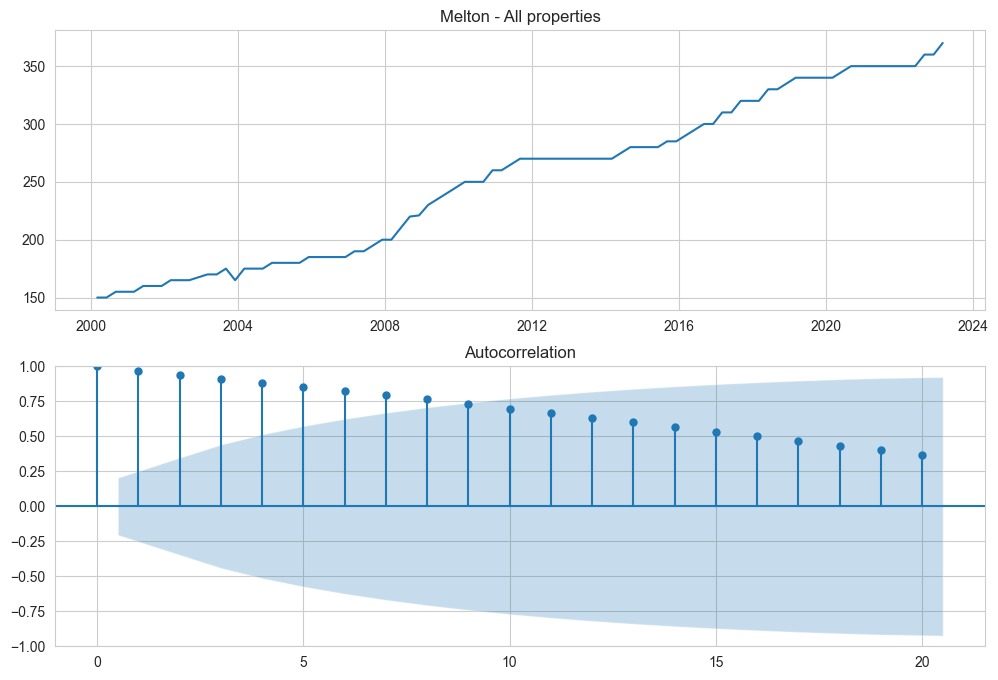

In [204]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(data_example.index, data_example['Median'])
ax1.set_title(f'{example_suburb} - {example_type}')
plot_acf(data_example['Median'], ax=ax2);

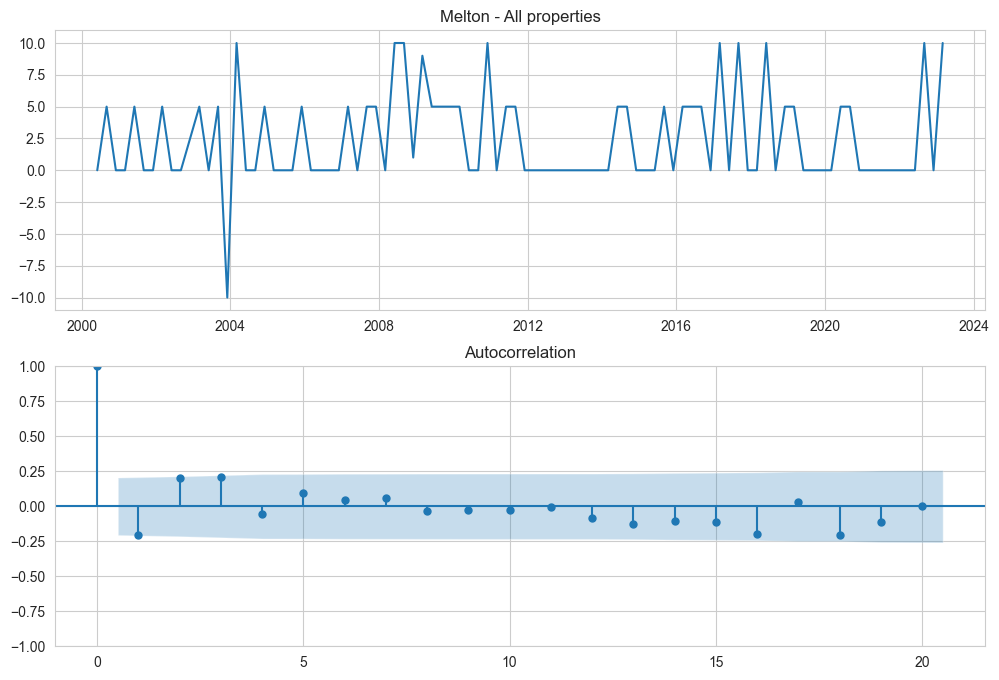

In [205]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(data_example['Median'].diff().dropna(), label='Median')
ax1.set_title(f'{example_suburb} - {example_type}')
plot_acf(data_example['Median'].diff().dropna(), ax=ax2);

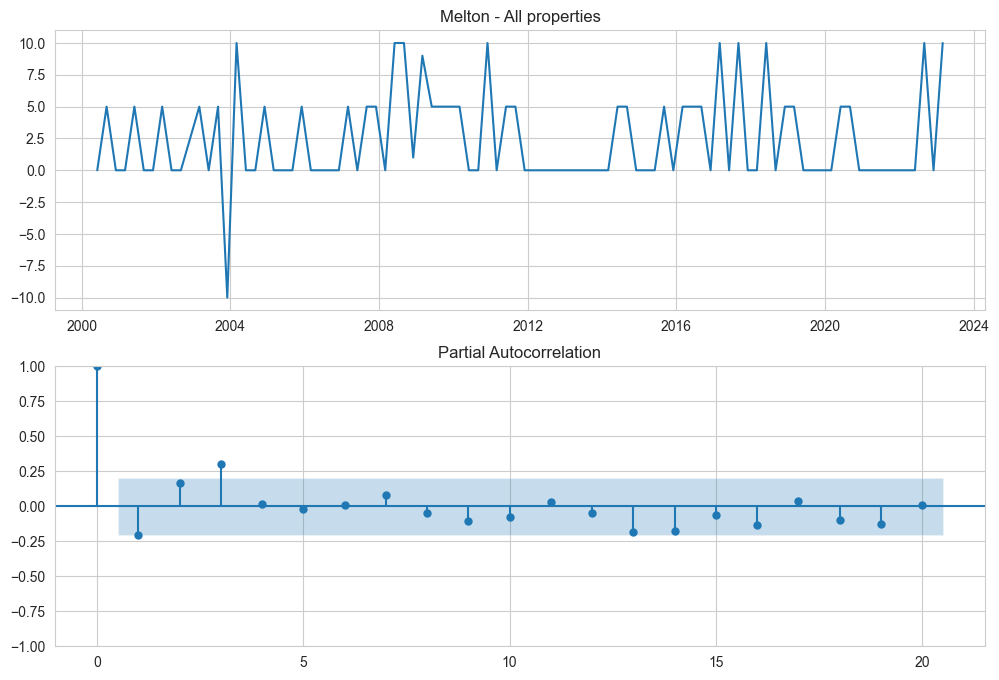

In [206]:
diff = data_example['Median'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(diff)
ax1.set_title(f'{example_suburb} - {example_type}')
plot_pacf(diff, ax=ax2);

In [207]:
# p = 4, d = 1, q = 3
model = ARIMA(data_example['Median'], order=(4, 1, 3))
model_fit = model.fit()

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagra

In [208]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Median   No. Observations:                   92
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -241.350
Date:                Sat, 05 Oct 2024   AIC                            498.699
Time:                        15:42:09   BIC                            518.786
Sample:                             0   HQIC                           506.803
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9835      0.166      5.911      0.000       0.657       1.310
ar.L2         -0.6666      0.179     -3.720      0.000      -1.018      -0.315
ar.L3          0.4655      0.153      3.044      0.002       0.166       0.765
ar.L4          0.1778      0.151      1.178      0.239      -0.118       0.474
ma.L1         -1.1478      0.148     -7.735      0.000      -1.439      -0.857
ma.L2          1.2184      0.124      9.798      0.000       0.975       1.462
ma.L3         -0.7768      0.108     -7.214      0.000      -0.988      -0.566
sigma2        10.9624      1.428      7.677      0.000       8.164      13.761
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.86   Prob(JB):                         0.19
Heteroskedasticity (H):               1.30   Skew:                             0.22
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([ 9., 70., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-11.19755818,  -3.13768028,   4.92219763,  12.98207554,
         21.04195345,  29.10183136,  37.16170927,  45.22158718,
         53.28146509,  61.341343  ,  69.40122091,  77.46109882,
         85.52097673,  93.58085464, 101.64073254, 109.70061045,
        117.76048836, 125.82036627, 133.88024418, 141.94012209,
        150.        ]),
 <BarContainer object of 20 artists>)

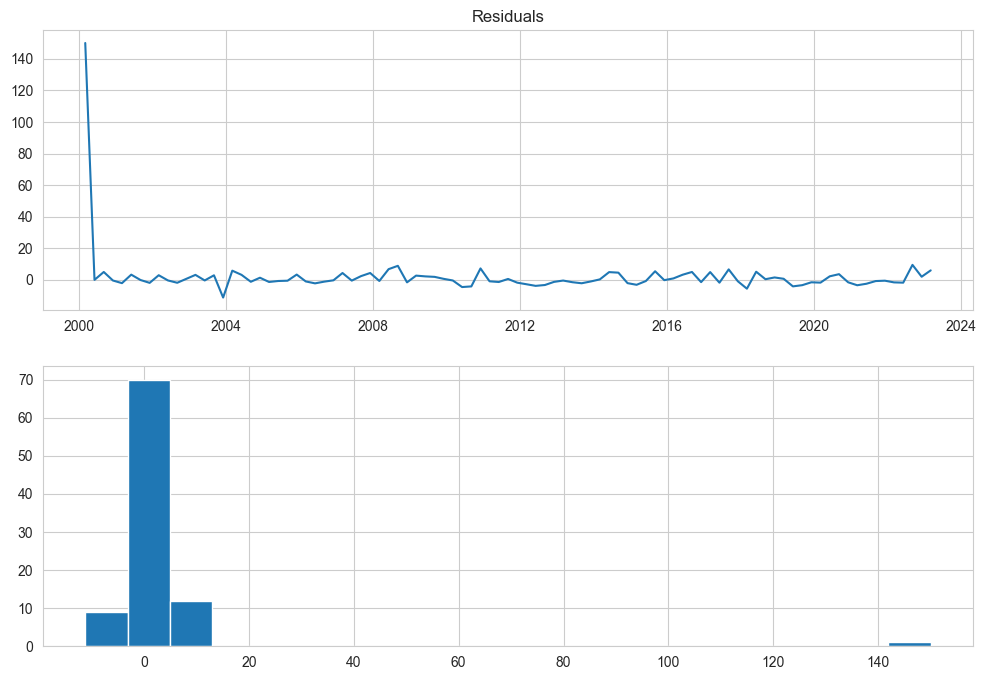

In [209]:
residuals = pd.DataFrame(model_fit.resid)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(residuals)
ax1.set_title('Residuals')
ax2.hist(residuals, bins=20)

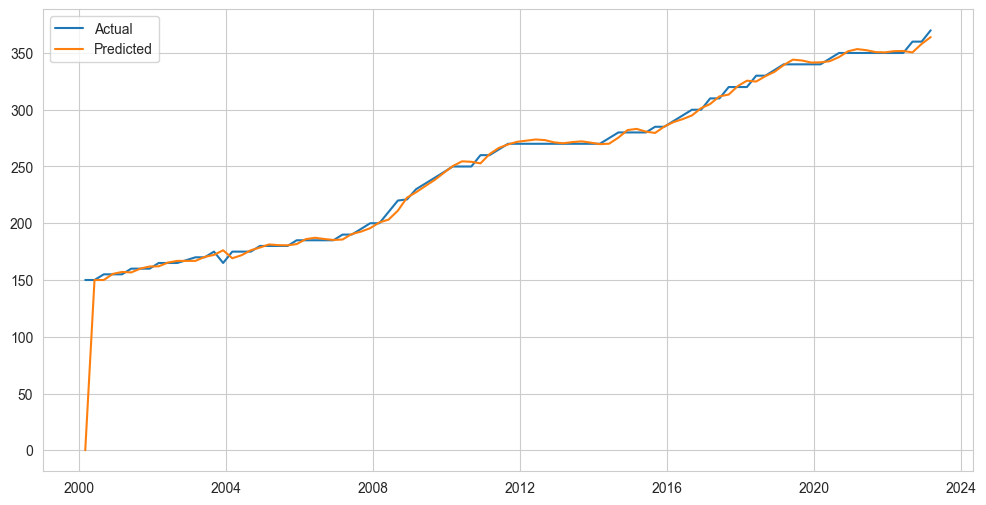

In [210]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data_example.index, data_example['Median'], label='Actual')
plt.plot(data_example.index, model_fit.fittedvalues, label='Predicted')
plt.legend()
plt.show()

In [211]:
n = int(len(data_example) * 0.8)
train = data_example.iloc[:n]
test = data_example.iloc[n:]
print(train.shape, test.shape)

(73, 1) (19, 1)


In [212]:
model = ARIMA(train['Median'], order=(4, 1, 3))
model_fit = model.fit()

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dakshagra

In [213]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Median   No. Observations:                   73
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -190.123
Date:                Sat, 05 Oct 2024   AIC                            396.245
Time:                        15:42:10   BIC                            414.458
Sample:                             0   HQIC                           403.496
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5050      1.247     -0.405      0.686      -2.950       1.940
ar.L2          0.6244      0.472      1.323      0.186      -0.300       1.549
ar.L3          0.5315      0.909      0.585      0.559      -1.249       2.312
ar.L4          0.1940      0.633      0.306      0.759      -1.047       1.435
ma.L1          0.2542      1.247      0.204      0.838      -2.189       2.698
ma.L2         -0.4504      0.319     -1.413      0.158      -1.075       0.174
ma.L3          0.1132      0.650      0.174      0.862      -1.160       1.387
sigma2        11.2669      1.944      5.795      0.000       7.456      15.078
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.82   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.29
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_ci

/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/dakshagrawal/PycharmProjects/project-2-group-real-estate-industry-project-3/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower Median,upper Median
73,322.922603,336.080298
74,325.590957,342.031449
75,326.322793,347.796528
76,325.698473,353.871397
77,325.563740,359.697844
78,324.884968,366.030387
79,323.846902,371.924163
80,322.739629,378.191695
81,321.306992,384.159079
82,319.761641,390.313736


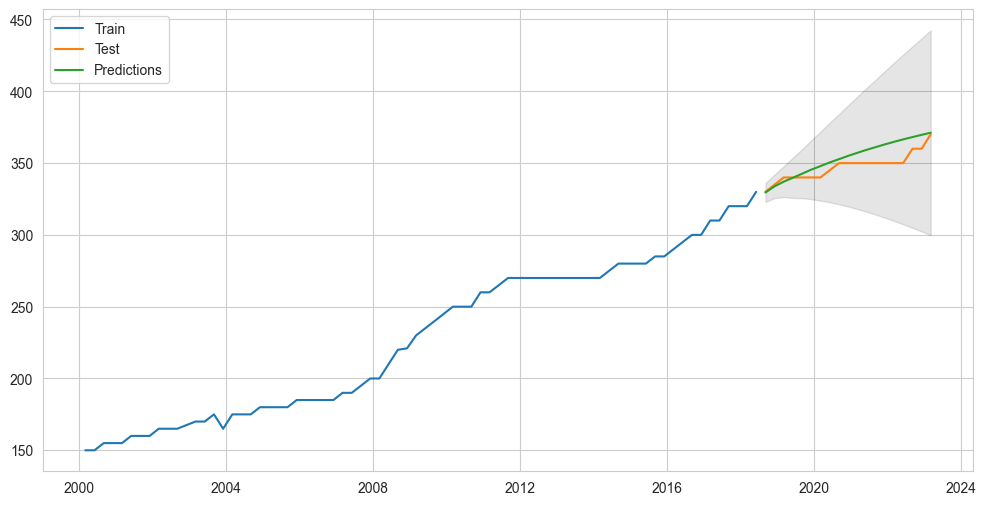

In [227]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Median'], label='Train')
plt.plot(test.index, test['Median'], label='Test')
plt.plot(test.index, forecast_mean, label='Predictions')
plt.fill_between(test.index, forecast_ci['lower Median'], forecast_ci['upper Median'], color='k', alpha=0.1)
plt.legend()
plt.show()